## Long Example 0: Text classification with pipelines

### How samples are split in Scikit-learn $K$-fold CV


EXECUTED

In [ ]:
# Import scikit-learn libraries
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# import other libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

In [ ]:
# create the range 1 to 14
rn = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
print(rn)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [ ]:
# to demonstrate how the data are split, we will create 3 and 5 folds. 
# KFold function has to be applied on the data and it returns an 
# location (index) of the train and test samples.
kf5 = KFold(n_splits=5, shuffle=False)
kf3 = KFold(n_splits=3, shuffle=False)

In [ ]:
# The Kfold function retunrs the indices of the data. 
# Our range goes from 1-14 so the index is 0-13
for train_index, test_index in kf3.split(rn):
    print(train_index, test_index)

[ 5  6  7  8  9 10 11 12 13] [0 1 2 3 4]
[ 0  1  2  3  4 10 11 12 13] [5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9] [10 11 12 13]


In [ ]:
# Comment: we have here that n/k is 14/3, which is 4 with a reminder r=2.
# The two reminder elements are assigned to the first two test folds.

In [ ]:
# K=5 folds:
for train_index, test_index in kf5.split(rn):
    print(train_index, test_index)

[ 3  4  5  6  7  8  9 10 11 12 13] [0 1 2]
[ 0  1  2  6  7  8  9 10 11 12 13] [3 4 5]
[ 0  1  2  3  4  5  9 10 11 12 13] [6 7 8]
[ 0  1  2  3  4  5  6  7  8 12 13] [ 9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11] [12 13]


#Therefore the splitting is done by taking the value of the reminder r and 
#assigning one further element to each fold until r-th fold

# Classification 


## Pipelines in scikit-learn (1)

- We spent a lot of time in pre-processing and cleaning data
- Therefore we need to create multipurpose software objects to be used in diffirent situations.
- For this we can use the Pipeline tool in scikit-learn.
- It is composed by *transformers* (tools for transforming data, for example to normalize a variable) and *estimators* (for example a fitting or predicting tool).
- All transformers and estimators in scikit-learn are implemented as Python *classes*, each with their own attributes and methods.
- We use *inherited* classes from scikit-learn to implement our own class.

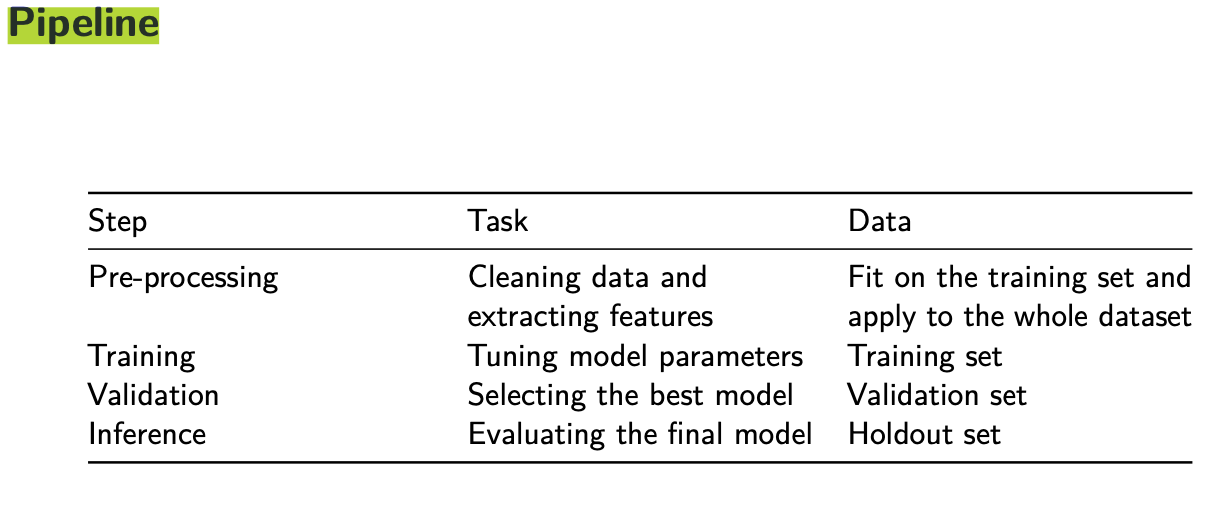





In [ ]:
# Example of inheritance
from sklearn.preprocessing import OneHotEncoder 
#Some data:
X = [[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]]
#Initializing an object of class OneHotEncoder
# Here we are "inheriting" classes from OneHotEncoder into the variable 'one_hot_enc'
one_hot_enc = OneHotEncoder( sparse = True )

#Calling methods on our OneHotEncoder object
one_hot_enc.fit( X ) #returns nothing
transformed_data = one_hot_enc.transform(X).toarray() #returns something
#fit_transformed_data = one_hot_enc.transform( X ) #returns something

In [ ]:
print(pd.DataFrame(X))
#Comments: The first column takes on 2 values, the second 3 and the fourth 4

   0  1  2
0  0  0  3
1  1  1  0
2  0  2  1
3  1  0  2


In [ ]:
print(transformed_data)
#Comments: the first two columns express the binary coding of the first "feature"; 
# the next three columns express the binary coding of the second "feature";
# The next four columns express the binary coding of the third "feature";

[[1. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1. 0.]]


## Pipelines in scikit-learn (2)

- Our own trasformer will be formed by inheriting from some other scikit-learn class.
- See a tutorial here https://www.programiz.com/python-programming/class about classes and objects in python and a tutorial here https://www.programiz.com/python-programming/inheritance about inheritance.
- The base classes inherited from scikit-learn are TransformerMixin (https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html) and BaseEstimator (https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html).

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Load Data
pd.set_option('display.max_colwidth', None)
BikeSent = pd.read_csv("BikeMiSentiment2019_UTF-8.csv", sep=';')
BikeSent

,v1,v2
0,positive,"When I had problems with the return of the bike, the assistance was very kind, but could not solve the problem quickly nor prevent me from being charged for the rental because I had exceeded half an hour (not because of the route I took carried out, but due to the impossibility of hanging up the bike in 2 different stations). It would be desirable to be able to solve problems more efficiently or at least not to charge the user in the event of a reported malfunction. For the rest, when the service works, it's really practical and useful.\t"
1,positive,"more electric bikes. often even if present they are not available when there are few, why?\t"
2,negative,pay more attention to stations that very often are without bicycles or full and do not allow their repositioning\t
3,positive,essential to insert bikes with child seats\t
4,positive,extension completed at train and metro stations not yet served\t
...,...,...
995,negative,"Main problem I think is the maintenance of traditional bikes, often you are forced to change bikes several times before finding a functioning one\t"
996,positive,"I feel good but without a credit card you can't even buy a day card, it doesn't seem right because students like me often only have a prepaid card\t"
997,positive,"I don't have any suggestions at the moment. the comment, thank you for the excellent service provided.\t"
998,positive,I would like it if the number of red ebikes increased considerably\t


In [ ]:
# Rename columns
BikeSent.columns = ["target", "text"]
BikeSent.head()

,target,text
0,positive,"When I had problems with the return of the bike, the assistance was very kind, but could not solve the problem quickly nor prevent me from being charged for the rental because I had exceeded half an hour (not because of the route I took carried out, but due to the impossibility of hanging up the bike in 2 different stations). It would be desirable to be able to solve problems more efficiently or at least not to charge the user in the event of a reported malfunction. For the rest, when the service works, it's really practical and useful.\t"
1,positive,"more electric bikes. often even if present they are not available when there are few, why?\t"
2,negative,pay more attention to stations that very often are without bicycles or full and do not allow their repositioning\t
3,positive,essential to insert bikes with child seats\t
4,positive,extension completed at train and metro stations not yet served\t


In [ ]:
# Encode categories
BikeSent['target'] = np.where(BikeSent['target']=='positive',1,0)
BikeSent.head()

,target,text
0,1,"When I had problems with the return of the bike, the assistance was very kind, but could not solve the problem quickly nor prevent me from being charged for the rental because I had exceeded half an hour (not because of the route I took carried out, but due to the impossibility of hanging up the bike in 2 different stations). It would be desirable to be able to solve problems more efficiently or at least not to charge the user in the event of a reported malfunction. For the rest, when the service works, it's really practical and useful.\t"
1,1,"more electric bikes. often even if present they are not available when there are few, why?\t"
2,0,pay more attention to stations that very often are without bicycles or full and do not allow their repositioning\t
3,1,essential to insert bikes with child seats\t
4,1,extension completed at train and metro stations not yet served\t


In [ ]:
# split the sample in train (used also for cross-validation) + test 
from sklearn.model_selection import train_test_split
X = BikeSent[['text']]
y = BikeSent['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [ ]:
X_train

,text
716,Luckily I have tried the new bicycle models a few times and they are definitely uncomfortable. I think there is a design error because the saddle is too far forward and you have difficulty pedaling. I hope you realize this before increasing the number of bikes you buy\t
351,Improve the bike pickup and storage system. For older people they are too heavy to lift\t
936,"I kindly ask you to make the stall n. 151 Balilla - Tibaldi. Sometimes it is uninhabitable and there are few bicycles available or they are generally few or poorly functioning (eg deflated wheels, poorly functioning brakes, gearshift changes).\t"
256,"bikes should be maintained much, much better, often with badly maintained bicycles and without brakes or even for the electrics that the battery does not work\t"
635,Increase maintenance\t
...,...
106,"A really useful service, I hope in the possibility of using 24 hours a day, especially for us young people it can be very useful at night when the vehicles are almost zero and you are forced to use taxis.\t"
270,only problem to report too often the stalls do not record the correct establishment of the bike and you risk icorrerere nela penalty\t
860,"Some discounts for the renewal of the subscription. The offers seem to me always and only for the new subscribers. In addition, a few more conventions for Bikemi subscribers who give discounts elsewhere.\t"
435,the service is smart but is very limited by the location of the stations. They are all a center. There isn't one in Stazione Lambrate or the eastern suburbs.\t


## Custom Transformers



### Cleaning Text
- We create here our own transformer (which will be a class) inheriting the TransformerMixin and the BaseEstimator classes from scikit-learn

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

# Custom Transformer (Inheriting from classes)
class CleanText( BaseEstimator, TransformerMixin ):
    
    # Class Constructor 
    # The class constructor is formed by a function with double underscore __ :
    # these are called 'special functions' as they have special meaning.
    # In particular the '__init__' gets called whenever 
    # a new object of that class is instantiated,
    # and are used to initialize all the necessary variables.
    # In this example we initialize the language variable 'lang' with 'English'
    # and pick the SnowballStemmer as the default stemmer.
    def __init__( self, lang = "english"):
        self.lang = lang
        self.stemmer = SnowballStemmer(self.lang)
    
    # The 'fit' method here is used to instantiate the class on the 'self' variable 
    # and return the object itself     
    def fit( self, X, y = None ):
        return self 
    
    # Custom function: this applies the stemmer just created in the '__init__'
    # part to the 'self' variable
    def clean( self, x ):
        words   = [self.stemmer.stem(word) for word in word_tokenize(x.lower()) if word.isalpha() and word not in stopwords.words("english")]
        return " ".join(words)
    
    # Method that describes what we need this transformer to do i.e. cleaning the text
    # in the 'text' column in the data frame.
    # This will be used later on in the usage of the custom transformer 
    # within the pipeline.
    def transform( self, X, y = None ):
        return X["text"].apply(self.clean)

### Feature extraction

In [ ]:
# Custom Transformer: same parts as the previous custom transformer
# This one will be used for feature extraction

class CustomFeatures( BaseEstimator, TransformerMixin ):
    
    # Class Constructor 
    def __init__( self ):
        return
    
    # Return self nothing else to do here    
    def fit( self, X, y = None ):
        return self 
        
    # Method that describes what we need this transformer to do i.e.
    # returning length, digits and punctuations in the 'text' column in data frame
    def transform( self, X, y = None ):
        f           = pd.DataFrame()
        f['len']    = X['text'].str.len()
        f['digits'] = X['text'].str.findall(r'\d').str.len()
        f['punct']  = X['text'].str.findall(r'[^a-zA-Z\d\s:]').str.len()
        return f[['len','digits','punct']]

## Pipeline usage


### Pipeline for data pre processing

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
# FeatureUnion combines two or more pipelines or transformers
# and is very fast!
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
# Our first pipeline called 'pipe' will be formed by three 'steps' or parts:
# 1)"extract" which in turns is formed through FeatureUnion which put together two parts:
# "terms" (formed by a pipeline with the CleanText() transformer we created above
# and the TfidVectorize text vectorizing transformer from scikit-learn) and "custom" 
# (formed by the CustomFeatures transformer we created above);
# 2) "select", formed by the scikit-learn transformer method "SelectKBest" for feature 
# selection with a chi squared score function;
# 3) "scale", same as 2) using the StandardScaler method from scikit-learn. 
# The whole pipeline will be used as pre-processing task in classifying pipelines.
pipe = Pipeline([("extract", FeatureUnion([("terms", Pipeline([('clean', CleanText()), 
                                                               ('tfidf', TfidfVectorizer())])),
                                           ("custom", CustomFeatures())])),
                 ("select", SelectKBest(score_func = chi2)),
                 ("scale", StandardScaler(with_mean = False))]) 

### Classifier implemented through pipelines: Logistic Model

In [ ]:
# Logistic Model
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from sklearn.linear_model import LogisticRegression
pipe_logistic = Pipeline([('pre_process', pipe),
                          ('classify', LogisticRegression(max_iter=10000, tol=0.1, solver='lbfgs'))])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AndreDany\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AndreDany\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [ ]:
# Fit on training
pipe_logistic.fit(X_train, y_train)

Pipeline(steps=[('pre_process',
                 Pipeline(steps=[('extract',
                                  FeatureUnion(transformer_list=[('terms',
                                                                  Pipeline(steps=[('clean',
                                                                                   CleanText()),
                                                                                  ('tfidf',
                                                                                   TfidfVectorizer())])),
                                                                 ('custom',
                                                                  CustomFeatures())])),
                                 ('select',
                                  SelectKBest(score_func=<function chi2 at 0x000001877B328280>)),
                                 ('scale', StandardScaler(with_mean=False))])),
                ('classify', LogisticRegression(max_iter=10000, tol=0.1))])

In [ ]:
# Evaluate on test
# The F1 score can be interpreted as a weighted average of the precision and recall, 
# where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision 
# and recall to the F1 score are equal. The formula for the F1 score is:
# F1 = 2 * (precision * recall) / (precision + recall)
from sklearn.metrics import f1_score
y_pred = pipe_logistic.predict(X_test)
f1_score(y_test, y_pred)

0.7972972972972973

In [ ]:
# we can classify new messages!
msg = pd.DataFrame(columns = ["text"],
                   data    = ["The bikes are heavy and unwieldy. The collection and return of the bicycle is super-comfortable because the bikes are heavy"])

pipe_logistic.predict(msg)

array([1])

In [ ]:
# we can classify new messages!
#msg = pd.DataFrame(columns = ["text"],
                   #data    = ["REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode"])

msg = pd.DataFrame(columns = ["text"],
                   data    = ["Satisfied"])


pipe_logistic.predict(msg)

array([1])

## Using bi-grams

In [ ]:
# extract features
pipe_extract = FeatureUnion([("terms", Pipeline([('clean', CleanText()), 
                                                 ('tfidf', TfidfVectorizer())])),
                             ("custom", CustomFeatures())])

# select and scale features
pipe_select_scale = Pipeline([("select", SelectKBest(score_func = chi2)),
                              ("scale", StandardScaler(with_mean = False))]) 

In [ ]:
# extract features
# you can also use bi-grams:
X_extract = pipe_extract.set_params(terms__tfidf__ngram_range = (1,2)).fit_transform(X_train, y_train)

In [ ]:
print(X_extract)

  (0, 697)	0.07090144070985319
  (0, 745)	0.17483279959508186
  (0, 785)	0.043180618930796104
  (0, 814)	0.17483279959508186
  (0, 1163)	0.1648630344692586
  (0, 1895)	0.14402927962636455
  (0, 1900)	0.17483279959508186
  (0, 1940)	0.1648630344692586
  (0, 1942)	0.17483279959508186
  (0, 2001)	0.1523026158602164
  (0, 2004)	0.17483279959508186
  (0, 2318)	0.1648630344692586
  (0, 2320)	0.17483279959508186
  (0, 2605)	0.1307761823598249
  (0, 2609)	0.17483279959508186
  (0, 2799)	0.157789373540365
  (0, 2800)	0.17483279959508186
  (0, 3315)	0.13525918980549953
  (0, 3323)	0.17483279959508186
  (0, 3509)	0.09334204887662222
  (0, 3529)	0.12370252143093134
  (0, 4020)	0.17483279959508186
  (0, 4021)	0.17483279959508186
  (0, 4343)	0.1523026158602164
  (0, 4346)	0.17483279959508186
  :	:
  (898, 1293)	0.14945135091427067
  (898, 1311)	0.25345986443799984
  (898, 2151)	0.23900642479096382
  (898, 2153)	0.25345986443799984
  (898, 3706)	0.20880316378705438
  (898, 3708)	0.25345986443799984
 

In [ ]:
# extract all features
X_select_scale = pipe_select_scale.set_params(select__k = 500).fit_transform(X_extract, y_train)
print(X_select_scale)

  (0, 222)	1.7463975570695727
  (0, 224)	4.868401476553422
  (0, 332)	3.3310922794931095
  (0, 391)	3.8799422337719514
  (0, 457)	4.664456373753558
  (0, 498)	2.431404727966195
  (0, 499)	0.6518039044082895
  (1, 215)	1.955545214342361
  (1, 216)	4.391664155129969
  (1, 498)	0.7954037771785323
  (1, 499)	0.32590195220414475
  (2, 190)	3.9374599587618193
  (2, 415)	2.9160268437218404
  (2, 498)	2.205437745813203
  (2, 499)	2.607215617633158
  (3, 30)	3.467617207975343
  (3, 35)	19.81764758098014
  (3, 44)	4.029061322449084
  (3, 254)	17.490606015887288
  (3, 283)	21.01627223472825
  (3, 294)	1.5146934286923344
  (3, 295)	9.407246305477612
  (3, 487)	4.614820388219279
  (3, 498)	1.4371500064930298
  (3, 499)	0.6518039044082895
  :	:
  (893, 494)	2.240618278439294
  (893, 498)	1.6992717057905007
  (893, 499)	0.6518039044082895
  (894, 347)	2.7889851989069125
  (894, 498)	0.831558494323011
  (895, 211)	2.8248704708645893
  (895, 397)	1.0910163308028165
  (895, 498)	1.8529292536545352
  (89

### Using cross-validation with parameters (grid)

In [ ]:
# Select best hyperparameters by cross validation
from sklearn.model_selection import GridSearchCV

# Model
logistic = LogisticRegression(max_iter=10000, tol=0.1, solver='lbfgs')

# Parameters: (np.logspace returns numbers spaced evenly on a log scale.)
param_logistic = {
    'C': np.logspace(-4, 4, 4)
}

# For an explanation of the 'C' parameter in scikit-learn logistic regression see:
# https://stackoverflow.com/questions/22851316/what-is-the-inverse-of-regularization-strength-in-logistic-regression-how-shoul
# C= 1/\lambda where \lambda can be assimilated to the regulatization parameter
# you probably have seen in the lasso regression
# Grid Search
cv_logistic = GridSearchCV(logistic, param_logistic, cv=10, scoring='f1')
cv_logistic.fit(X_select_scale, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000, tol=0.1),
             param_grid={'C': array([1.00000000e-04, 4.64158883e-02, 2.15443469e+01, 1.00000000e+04])},
             scoring='f1')

In [ ]:
# See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
print(cv_logistic.best_estimator_)

LogisticRegression(C=0.046415888336127774, max_iter=10000, tol=0.1)


In [ ]:
print(cv_logistic.best_score_)

0.9020406477845386


### Similar with pipeline

In [ ]:
# Pipe Logistic
pipe_logistic = Pipeline([('select_scale', pipe_select_scale),
                          ('classify', LogisticRegression(max_iter=10000, tol=0.1, solver='lbfgs'))])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_logistic = {
    'classify__C': np.logspace(-4, 4, 3),
    'select_scale__select__k': [600, 1000, 5000]
}

cv_logistic = GridSearchCV(pipe_logistic, param_logistic, cv=10, scoring='f1')
cv_logistic.fit(X_extract, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('select_scale',
                                        Pipeline(steps=[('select',
                                                         SelectKBest(k=500,
                                                                     score_func=<function chi2 at 0x000001877B328280>)),
                                                        ('scale',
                                                         StandardScaler(with_mean=False))])),
                                       ('classify',
                                        LogisticRegression(max_iter=10000,
                                                           tol=0.1))]),
             param_grid={'classify__C': array([1.e-04, 1.e+00, 1.e+04]),
                         'select_scale__select__k': [600, 1000, 5000]},
             scoring='f1')

In [ ]:
print(cv_logistic.best_estimator_)

Pipeline(steps=[('select_scale',
                 Pipeline(steps=[('select',
                                  SelectKBest(k=5000,
                                              score_func=<function chi2 at 0x000001877B328280>)),
                                 ('scale', StandardScaler(with_mean=False))])),
                ('classify',
                 LogisticRegression(C=10000.0, max_iter=10000, tol=0.1))])


In [ ]:
print(cv_logistic.best_score_)

0.8457155973785053


## Other Models

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Pipe NB
pipe_nb = Pipeline([('select_scale', pipe_select_scale),
                    ('classify', MultinomialNB())])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_nb = {
    'classify__alpha': [0.5, 1, 10],
    'select_scale__select__k': [600, 1000, 5000]
}

cv_nb = GridSearchCV(pipe_nb, param_nb, cv=10, scoring='f1')
cv_nb.fit(X_extract, y_train)
print(cv_nb.best_score_)



0.8301298848126655


In [ ]:
# full pipeline
model = Pipeline([("extract", FeatureUnion([("terms", Pipeline([('clean', CleanText()), 
                                                                ('tfidf', TfidfVectorizer(ngram_range = (1,2)))])),
                                           ("custom", CustomFeatures())])),
                 ("select", SelectKBest(score_func = chi2, k = 1000)),
                 ("scale", StandardScaler(with_mean = False)),
                 ("classify", MultinomialNB())]) 

# fitting
model.fit(X_train, y_train)

# final evaluation
y_pred = model.predict(X_test)
f1_score(y_test, y_pred)

0.782608695652174

In [ ]:
# we are now able to classify new messages!
#msg = pd.DataFrame(columns = ["text"],
                   #data    = ["REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode"])

msg = pd.DataFrame(columns = ["text"],
                   data    = ["The bikes are heavy and unwieldy. The collection and return of the bicycle is super-comfortable because the bikes are heavy"])

model.predict(msg)

array([0])

In [ ]:
# we are now able to classify new messages!
#msg = pd.DataFrame(columns = ["text"],
                   #data    = ["REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode"])

msg = pd.DataFrame(columns = ["text"],
                   data    = ["Satisfied"])


model.predict(msg)

array([1])

### Support Vector Machine

In [ ]:
from sklearn.svm import LinearSVC

# Pipe SVC
pipe_svc = Pipeline([('select_scale', pipe_select_scale),
                     ('classify', LinearSVC(max_iter=10000, tol=0.1))])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_svc = {
    'classify__C': [0.01, 0.1, 1],
    'select_scale__select__k': [600, 1000, 5000]
}

cv_svc = GridSearchCV(pipe_svc, param_svc, cv=10, scoring='f1')
cv_svc.fit(X_extract, y_train)
print(cv_svc.best_score_)

0.8463498495228174


In [ ]:
# full pipeline
model = Pipeline([("extract", FeatureUnion([("terms", Pipeline([('clean', CleanText()), 
                                                                ('tfidf', TfidfVectorizer(ngram_range = (1,2)))])),
                                           ("custom", CustomFeatures())])),
                 ("select", SelectKBest(score_func = chi2, k = 1000)),
                 ("scale", StandardScaler(with_mean = False)),
                 ("classify", LinearSVC(C = 1, max_iter=10000, tol=0.1))]) 

# fitting
model.fit(X_train, y_train)

# final evaluation
y_pred = model.predict(X_test)
f1_score(y_test, y_pred)

0.7972972972972973

In [ ]:
# we are now able to classify new messages!
#msg = pd.DataFrame(columns = ["text"],
                   #data    = ["REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode"])

msg = pd.DataFrame(columns = ["text"],
                   data    = ["The bikes are heavy and unwieldy. The collection and return of the bicycle is super-comfortable because the bikes are heavy"])

model.predict(msg)

array([0])

In [ ]:
# we are now able to classify new messages!
#msg = pd.DataFrame(columns = ["text"],
                   #data    = ["REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode"])

msg = pd.DataFrame(columns = ["text"],
                   data    = ["Satisfied"])


model.predict(msg)

array([1])

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Pipe RF
pipe_rf = Pipeline([('select_scale', pipe_select_scale),
                    ('classify', RandomForestClassifier())])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_rf = {
    'classify__n_estimators': [100, 200],
    'select_scale__select__k': [600, 1000]
}

cv_rf = GridSearchCV(pipe_rf, param_rf, cv=10, scoring='f1')
cv_rf.fit(X_extract, y_train)
print(cv_rf.best_score_)

0.8525048282830261


In [ ]:
# full pipeline
model = Pipeline([("extract", FeatureUnion([("terms", Pipeline([('clean', CleanText()), 
                                                                ('tfidf', TfidfVectorizer(ngram_range = (1,2)))])),
                                           ("custom", CustomFeatures())])),
                 ("select", SelectKBest(score_func = chi2, k = 1000)),
                 ("scale", StandardScaler(with_mean = False)),
                 ("classify", RandomForestClassifier())]) 

# fitting
model.fit(X_train, y_train)

# final evaluation
y_pred = model.predict(X_test)
f1_score(y_test, y_pred)

0.8053691275167785

In [ ]:
# we are now able to classify new messages!
#msg = pd.DataFrame(columns = ["text"],
                   #data    = ["REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode"])

msg = pd.DataFrame(columns = ["text"],
                   data    = ["The bikes are heavy and unwieldy. The collection and return of the bicycle is super-comfortable because the bikes are heavy"])

model.predict(msg)

array([1])

In [ ]:
# we are now able to classify new messages!
#msg = pd.DataFrame(columns = ["text"],
                   #data    = ["REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode"])

msg = pd.DataFrame(columns = ["text"],
                   data    = ["Satisfied"])


model.predict(msg)

array([1])

## Long Example 1: Text clustering

In [ ]:
import re
import string
import pandas as pd

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

## Full text for clustering

This corpus contain some strings about Google and some strings about TF-IDF from Wikipedia. Just for example

In [ ]:
all_text = """
Google and Facebook are strangling the free press to death. Democracy is the loser
Your 60-second guide to security stuff Google touted today at Next '18
A Guide to Using Android Without Selling Your Soul to Google
Review: Lenovo’s Google Smart Display is pretty and intelligent
Google Maps user spots mysterious object submerged off the coast of Greece - and no-one knows what it is
Android is better than IOS
In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency
is a numerical statistic that is intended to reflect how important 
a word is to a document in a collection or corpus.
It is often used as a weighting factor in searches of information retrieval
text mining, and user modeling. The tf-idf value increases proportionally
to the number of times a word appears in the document
and is offset by the frequency of the word in the corpus
""".split("\n")[1:-1]

In [ ]:
all_text

['Google and Facebook are strangling the free press to death. Democracy is the loser',
 "Your 60-second guide to security stuff Google touted today at Next '18",
 'A Guide to Using Android Without Selling Your Soul to Google',
 'Review: Lenovo’s Google Smart Display is pretty and intelligent',
 'Google Maps user spots mysterious object submerged off the coast of Greece - and no-one knows what it is',
 'Android is better than IOS',
 'In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency',
 'is a numerical statistic that is intended to reflect how important ',
 'a word is to a document in a collection or corpus.',
 'It is often used as a weighting factor in searches of information retrieval',
 'text mining, and user modeling. The tf-idf value increases proportionally',
 'to the number of times a word appears in the document',
 'and is offset by the frequency of the word in the corpus']

## Preprocessing and tokenizing
Firstly, we must bring every chars to lowercase and remove all punctuation, because it's not important for our task, but is very harmful for clustering algorithm. 
After that, we'll split strings to array of words.

In [ ]:
def preprocessing(line):
    line = line.lower()
    line = re.sub(r"[{}]".format(string.punctuation), " ", line)
    return line

Now, let's calculate tf-idf for this corpus

In [ ]:
tfidf_vectorizer = TfidfVectorizer(preprocessor=preprocessing)
tfidf = tfidf_vectorizer.fit_transform(all_text)

## K-means

In [ ]:
kmeans = KMeans(n_clusters=2)

In [ ]:
list(zip(kmeans.fit_predict(tfidf), all_text))

[(0,
  'Google and Facebook are strangling the free press to death. Democracy is the loser'),
 (0, "Your 60-second guide to security stuff Google touted today at Next '18"),
 (0, 'A Guide to Using Android Without Selling Your Soul to Google'),
 (0, 'Review: Lenovo’s Google Smart Display is pretty and intelligent'),
 (0,
  'Google Maps user spots mysterious object submerged off the coast of Greece - and no-one knows what it is'),
 (0, 'Android is better than IOS'),
 (1,
  'In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency'),
 (0, 'is a numerical statistic that is intended to reflect how important '),
 (1, 'a word is to a document in a collection or corpus.'),
 (1,
  'It is often used as a weighting factor in searches of information retrieval'),
 (1,
  'text mining, and user modeling. The tf-idf value increases proportionally'),
 (1, 'to the number of times a word appears in the document'),
 (1, 'and is offset by the frequency of the word in t

## Agglomerative Clustering

In [ ]:
hac = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')

In [ ]:
list(zip(hac.fit_predict(tfidf.toarray()), all_text))

[(0,
  'Google and Facebook are strangling the free press to death. Democracy is the loser'),
 (1, "Your 60-second guide to security stuff Google touted today at Next '18"),
 (1, 'A Guide to Using Android Without Selling Your Soul to Google'),
 (0, 'Review: Lenovo’s Google Smart Display is pretty and intelligent'),
 (0,
  'Google Maps user spots mysterious object submerged off the coast of Greece - and no-one knows what it is'),
 (1, 'Android is better than IOS'),
 (0,
  'In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency'),
 (1, 'is a numerical statistic that is intended to reflect how important '),
 (0, 'a word is to a document in a collection or corpus.'),
 (0,
  'It is often used as a weighting factor in searches of information retrieval'),
 (0,
  'text mining, and user modeling. The tf-idf value increases proportionally'),
 (0, 'to the number of times a word appears in the document'),
 (0, 'and is offset by the frequency of the word in t

## Example 2: Topic model (1): BikeMi survey


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AndreDany\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

### Cleaning and pre-processing

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop=set(stopwords.words('english'))
exclude=set(string.punctuation)
lemma=WordNetLemmatizer()
def clean(doc):
    stop_free=" ".join([i for i in doc.lower().split() if i not in stop])
    punc_free=''.join(ch for ch in stop_free if ch not in exclude)
    normalized=" ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [ ]:
import pandas as pd
df = pd.read_csv('Polarity2014Reduced.csv', sep = ";", header = 0)
df.columns=['review','sentiment']
df2=df[df['sentiment']==-1]
df2.shape

(354, 2)

In [ ]:
doc_complete=df2.iloc[0:2065,0].values.tolist()
doc_clean=[clean(doc).split() for doc in doc_complete]

# Getting the document-term matrix

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
SOME_FIXED_SEED = 42
np.random.seed(SOME_FIXED_SEED)

In [ ]:
cv=CountVectorizer(min_df=2,max_df=50,ngram_range=(1,2), token_pattern=None, tokenizer=lambda doc:doc,preprocessor=lambda doc:doc)

In [ ]:
cv_features=cv.fit_transform(doc_clean)
print(cv_features.shape)
vocabulary=np.array(cv.get_feature_names())

(354, 1392)


In [ ]:
vocabulary

array(['1', '1 volta', '10', ..., '√® stato', '√® troppo', '√® un'],
      dtype='<U24')

In [ ]:
vocabulary

array(['1', '1 volta', '10', ..., '√® stato', '√® troppo', '√® un'],
      dtype='<U24')

# LDA ANALYSIS

In [ ]:
# Using sklearn.decomposition LDA with 11 topics
from sklearn.decomposition import LatentDirichletAllocation
TOTAL_TOPICS=11

In [ ]:
lda_model=LatentDirichletAllocation(n_components=TOTAL_TOPICS,max_iter=500,max_doc_update_iter=50,learning_method='online',batch_size=1740,learning_offset=50.,random_state=42,n_jobs=16)

In [ ]:
# Using the transformer 'fit_transform'
document_topics=lda_model.fit_transform(cv_features)


In [ ]:
document_topics.shape

(354, 11)

In [ ]:
# Extraqcting the most important 10 terms for each topic
topic_terms=lda_model.components_
top_terms=10 # number of 'top terms'
topic_key_terms_idxs=np.argsort(-np.absolute(topic_terms), axis=1)[:,:top_terms]
topic_keyterms=vocabulary[topic_key_terms_idxs]
topics=[', '.join(topic) for topic in topic_keyterms]
pd.set_option('display.max_colwidth',-1)
topics_df=pd.DataFrame(topics,columns=['Term per Topic'], index=['Topic'+str(t) for t in range(1,TOTAL_TOPICS+1)])
topics_df

,Term per Topic
Topic1,"della, completamente, servizio, la bici, possibilit√†, possibilit√† di, tramite, segnalare, app, troppo"
Topic2,"servizio, bicicletta, lasciare, la bicicletta, cambio, stalli, se, le stazioni, lasciare la, la bici"
Topic3,"piene, con, sempre, al, vuote, molto, tutte, alcune, le colonnine, colonnine"
Topic4,"mi, da, mi √®, servizio, stazione, la bici, se, √® capitato, capitato, bikemi"
Topic5,"con, tempo, migliorare, al, ecc, cambio, sistema, delle bici, migliorare il, anche"
Topic6,"essere, con, le bici, frequenza, essere pi√π, manutenzione, bike, bici con, bici sono, troppo"
Topic7,"pi√π spesso, al, gomme, spesso le, della, cambio, le bici, del, gonfiare, controllare"
Topic8,"possibilit√† di, possibilit√†, segnalare, della, di segnalare, che non, dei, controllare pi√π, delle biciclette, al"
Topic9,"troppo, piste, piste ciclabili, ciclabili, cambio, con, problemi, ruote, manutenzione, sgonfie"
Topic10,"anche, le stazioni, stazione, molto, piene, servizio, tempo, del, da, cambio"


In [ ]:
dt_df=pd.DataFrame(document_topics,columns=['T'+str(i) for i in range(1,TOTAL_TOPICS+1)])
dt_df                                                                      

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11
0,0.005348,0.005348,0.005348,0.005348,0.005348,0.005348,0.005348,0.005348,0.946523,0.005348,0.005348
1,0.009091,0.909084,0.009091,0.009091,0.009091,0.009091,0.009092,0.009092,0.009093,0.009091,0.009091
2,0.002841,0.971589,0.002841,0.002841,0.002841,0.002841,0.002841,0.002841,0.002841,0.002841,0.002841
3,0.015152,0.015153,0.015154,0.848456,0.015152,0.015160,0.015157,0.015152,0.015156,0.015152,0.015157
4,0.001567,0.001567,0.984325,0.001567,0.001567,0.001567,0.001567,0.001567,0.001568,0.001567,0.001568
...,...,...,...,...,...,...,...,...,...,...,...
349,0.003637,0.003637,0.003636,0.003637,0.003636,0.003637,0.003637,0.003637,0.433846,0.003637,0.533425
350,0.010101,0.010102,0.010102,0.898987,0.010101,0.010101,0.010102,0.010101,0.010101,0.010101,0.010101
351,0.018183,0.018182,0.018182,0.018182,0.018183,0.018182,0.018183,0.818175,0.018182,0.018182,0.018182
352,0.002392,0.002393,0.002393,0.002392,0.002392,0.002392,0.002392,0.002392,0.002393,0.976075,0.002392


In [ ]:
# Column 'Contribution%' gives the max probability among the 354 
# features (terms) for each topic
dt_df=pd.DataFrame(document_topics,columns=['T'+str(i) for i in range(1,TOTAL_TOPICS+1)])
pd.options.display.float_format='{:,.5f}'.format
pd.set_option('display.max_colwidth',200)
max_contrib_topics=dt_df.max(axis=0)
dominant_topics=max_contrib_topics.index
contrib_perc=max_contrib_topics.values
document_numbers=[dt_df[dt_df[t]==max_contrib_topics.loc[t]].index[0] for t in dominant_topics]
results_df=pd.DataFrame({'Dominant Topic':dominant_topics,'Contribution%':contrib_perc, 'Answer Num': document_numbers,'Topic':topics_df['Term per Topic']})
results_df

,Dominant Topic,Contribution%,Answer Num,Topic
Topic1,T1,0.97159,193,"della, completamente, servizio, la bici, possibilit√†, possibilit√† di, tramite, segnalare, app, troppo"
Topic2,T2,0.99209,179,"servizio, bicicletta, lasciare, la bicicletta, cambio, stalli, se, le stazioni, lasciare la, la bici"
Topic3,T3,0.98510,52,"piene, con, sempre, al, vuote, molto, tutte, alcune, le colonnine, colonnine"
Topic4,T4,0.98978,328,"mi, da, mi √®, servizio, stazione, la bici, se, √® capitato, capitato, bikemi"
Topic5,T5,0.99072,28,"con, tempo, migliorare, al, ecc, cambio, sistema, delle bici, migliorare il, anche"
Topic6,T6,0.96503,126,"essere, con, le bici, frequenza, essere pi√π, manutenzione, bike, bici con, bici sono, troppo"
Topic7,T7,0.98557,342,"pi√π spesso, al, gomme, spesso le, della, cambio, le bici, del, gonfiare, controllare"
Topic8,T8,0.96503,174,"possibilit√† di, possibilit√†, segnalare, della, di segnalare, che non, dei, controllare pi√π, delle biciclette, al"
Topic9,T9,0.98943,294,"troppo, piste, piste ciclabili, ciclabili, cambio, con, problemi, ruote, manutenzione, sgonfie"
Topic10,T10,0.98864,198,"anche, le stazioni, stazione, molto, piene, servizio, tempo, del, da, cambio"


In [ ]:
# This gives, for each topic, the % of features having prob >0.9
numT1=np.count_nonzero(dt_df['T1']>0.9)
FrT1=numT1/2133
numT2=np.count_nonzero(dt_df['T2']>0.9)
FrT2=numT2/2133
numT3=np.count_nonzero(dt_df['T3']>0.9)
FrT3=numT3/2133
numT4=np.count_nonzero(dt_df['T4']>0.9)
FrT4=numT4/2133
numT5=np.count_nonzero(dt_df['T5']>0.9)
FrT5=numT5/2133
numT6=np.count_nonzero(dt_df['T6']>0.9)
FrT6=numT6/2133
numT7=np.count_nonzero(dt_df['T7']>0.9)
FrT7=numT7/2133
numT8=np.count_nonzero(dt_df['T8']>0.9)
FrT8=numT8/2133
numT9=np.count_nonzero(dt_df['T9']>0.9)
FrT9=numT9/2133
numT10=np.count_nonzero(dt_df['T10']>0.9)
FrT10=numT10/2133
numT11=np.count_nonzero(dt_df['T11']>0.9)
FrT11=numT11/2133
d=(FrT1,FrT2,FrT3,FrT4,FrT5,FrT6,FrT7,FrT8,FrT9,FrT10,FrT11)
df_Fr=pd.DataFrame(data=d)
results_df.insert(4,'Freq 0.9-1',df_Fr.values)
results_df

,Dominant Topic,Contribution%,Answer Num,Topic,Freq 0.9-1
Topic1,T1,0.97159,193,"della, completamente, servizio, la bici, possibilit√†, possibilit√† di, tramite, segnalare, app, troppo",0.00516
Topic2,T2,0.99209,179,"servizio, bicicletta, lasciare, la bicicletta, cambio, stalli, se, le stazioni, lasciare la, la bici",0.01547
Topic3,T3,0.98510,52,"piene, con, sempre, al, vuote, molto, tutte, alcune, le colonnine, colonnine",0.01172
Topic4,T4,0.98978,328,"mi, da, mi √®, servizio, stazione, la bici, se, √® capitato, capitato, bikemi",0.00891
Topic5,T5,0.99072,28,"con, tempo, migliorare, al, ecc, cambio, sistema, delle bici, migliorare il, anche",0.00609
Topic6,T6,0.96503,126,"essere, con, le bici, frequenza, essere pi√π, manutenzione, bike, bici con, bici sono, troppo",0.00469
Topic7,T7,0.98557,342,"pi√π spesso, al, gomme, spesso le, della, cambio, le bici, del, gonfiare, controllare",0.00797
Topic8,T8,0.96503,174,"possibilit√† di, possibilit√†, segnalare, della, di segnalare, che non, dei, controllare pi√π, delle biciclette, al",0.00797
Topic9,T9,0.98943,294,"troppo, piste, piste ciclabili, ciclabili, cambio, con, problemi, ruote, manutenzione, sgonfie",0.02391
Topic10,T10,0.98864,198,"anche, le stazioni, stazione, molto, piene, servizio, tempo, del, da, cambio",0.00656
